In [1]:
%display typeset

## Invariants and Diagrams for Weights

### Basic Definitions and Invariants

In [3]:
from liesuperalg import Weight
w = Weight([7, 6, 5, 5, 3, 3, 2, 2, 0], [1, 2, 3, 4, 4, 5, 7, 7])
w

gl(9 | 8) weight ( 7,  6,  5,  5,  3,  3,  2,  2,  0 |  1,  2,  3,  4,  4,  5,  7,  7)

In [4]:
w.L, w.R

([7, 6, 5, 5, 3, 3, 2, 2, 0], [1, 2, 3, 4, 4, 5, 7, 7])

In [5]:
w.m, w.n

(9, 8)

In [6]:
from liesuperalg import rho
rho(9, 8)

gl(9 | 8) weight ( 9,  8,  7,  6,  5,  4,  3,  2,  1 |  1,  2,  3,  4,  5,  6,  7,  8)

In [7]:
w.rho()

gl(9 | 8) weight (16, 14, 12, 11,  8,  7,  5,  4,  1 |  2,  4,  6,  8,  9, 11, 14, 15)

In [8]:
w + rho(9, 8) == w.rho()

True

In [9]:
w.rho() - w == rho(9, 8)

True

In [10]:
from liesuperalg import one
rho(5, 4) == one(5, 4)

False

### Representation Theoretic Invariants

In [11]:
from liesuperalg import Weight
w = Weight([7, 6, 5, 5, 3, 3, 2, 2, 0], [1, 2, 3, 4, 4, 5, 7, 7])
w.atypical_roots

[(8, 11), (5, 13), (4, 15), (2, 16)]

In [12]:
w.adeg # degree of atypicality

4

In [13]:
matrix(w.atypicality_matrix)

[ 14  12  10   8   7   5   2   1]
[ 12  10   8   6   5   3   0  -1]
[ 10   8   6   4   3   1  -2  -3]
[  9   7   5   3   2   0  -3  -4]
[  6   4   2   0  -1  -3  -6  -7]
[  5   3   1  -1  -2  -4  -7  -8]
[  3   1  -1  -3  -4  -6  -9 -10]
[  2   0  -2  -4  -5  -7 -10 -11]
[ -1  -3  -5  -7  -8 -10 -13 -14]

In [14]:
w.typ # typical tuple

[[16, 12, 7, 5, 1], [2, 6, 9, 15]]

In [15]:
w.atyp # atypical tuple

[4, 8, 11, 14]

In [16]:
w.height # height vector

[1, 1, 2, 3]

In [17]:
from liesuperalg import typ_atyp_to_weight
from liesuperalg import height_to_atyp
t = [[16, 12, 7, 5, 1], [2, 6, 9, 15]]
h = [1, 1, 2, 3]
typ_atyp_to_weight(t, height_to_atyp(h, t))

gl(9 | 8) weight ( 7,  6,  5,  5,  3,  3,  2,  2,  0 |  1,  2,  3,  4,  4,  5,  7,  7)

In [18]:
typ_atyp_to_weight(t, height_to_atyp(h, t)) == w

True

### Cup Diagrams

/home/abhikpal/.bin/anaconda3/lib/python3.12/site-packages/sage/plot/point.py:314: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  subplot.scatter(self.xdata, self.ydata, s=s, c=c, alpha=a, zorder=z,


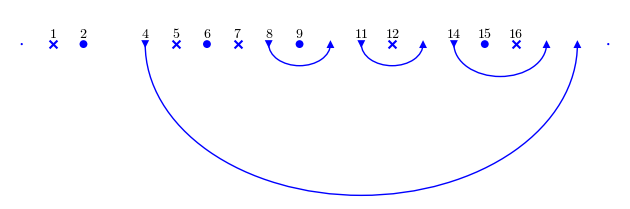

In [19]:
from liesuperalg import cup_diagram
cup_diagram(w)

## Representations, Characters, and Kazhdan-Lusztig Polynomials

In [20]:
from liesuperalg import gen_KL
from liesuperalg import mult_kac_in_irrd

var('q')
w_lambda = Weight([7, 6, 5, 5, 3, 3, 2, 2, 0], [1, 2, 3, 4, 4, 5, 7, 7])
w_mu = Weight([7, 4, 4, 4, 2, 1, 1, 1, 0], [1, 1, 1, 2, 4, 4, 4, 7])

w_lambda >= w_mu

True

In [21]:
gen_KL(w_lambda, w_mu, q)

q^5*(1/q^2 + 1)

In [22]:
mult_kac_in_irrd(w_lambda, w_mu) == gen_KL(w_lambda, w_mu, -1)

True

## Composition Factors of Kac Modules

In [23]:
# Example 3.13 (Su 2006)
from liesuperalg import kac_composition_factors
w_lambda = Weight([8, 5, 5, 3, 3, 2, 2], [2, 3, 4, 4, 5, 9])
for i, w_mu in enumerate(kac_composition_factors(w_lambda), start=1):
    print(f"{i:2}: {w_mu.rho()}")

 1: (15, 11, 10,  7,  6,  4,  3 |  3,  5,  7,  8, 10, 15)
 2: (15, 11, 10,  7,  6,  4,  2 |  2,  5,  7,  8, 10, 15)
 3: (15, 11, 10,  6,  4,  2,  1 |  1,  2,  5,  8, 10, 15)
 4: (15, 11,  9,  7,  6,  4,  3 |  3,  5,  7,  8,  9, 15)
 5: (15, 11,  9,  7,  6,  4,  2 |  2,  5,  7,  8,  9, 15)
 6: (15, 11,  9,  6,  4,  2,  1 |  1,  2,  5,  8,  9, 15)
 7: (15, 11,  7,  6,  4,  2,  1 |  1,  2,  5,  7,  8, 15)
 8: (14, 11, 10,  7,  6,  4,  3 |  3,  5,  7,  8, 10, 14)
 9: (14, 11, 10,  7,  6,  4,  2 |  2,  5,  7,  8, 10, 14)
10: (14, 11, 10,  6,  4,  2,  1 |  1,  2,  5,  8, 10, 14)
11: (14, 11,  9,  7,  6,  4,  3 |  3,  5,  7,  8,  9, 14)
12: (14, 11,  9,  7,  6,  4,  2 |  2,  5,  7,  8,  9, 14)
13: (14, 11,  9,  6,  4,  2,  1 |  1,  2,  5,  8,  9, 14)
14: (14, 11,  7,  6,  4,  2,  1 |  1,  2,  5,  7,  8, 14)


In [24]:
# Example 5.6 (Su-Zhang 2012)
from liesuperalg import kac_composition_factors
w_lambda = Weight([2, 1, 1, 0, 0], [0, 0, 1, 3, 3, 4])
for i, w_mu in enumerate(kac_composition_factors(w_lambda), start=1):
    print(f"{i:2}: {w_mu}")

 1: ( 2,  1,  1,  0,  0 |  0,  0,  1,  3,  3,  4)
 2: ( 2,  1,  1,  0, -1 | -1,  0,  1,  3,  3,  4)
 3: ( 2,  1,  1, -2, -2 | -2, -2,  1,  3,  3,  4)
 4: ( 2,  1,  0,  0,  0 |  0,  0,  0,  3,  3,  4)
 5: ( 2,  1,  0,  0, -1 | -1,  0,  0,  3,  3,  4)
 6: ( 2,  1,  0, -2, -2 | -2, -2,  0,  3,  3,  4)
 7: ( 2,  1, -1, -2, -2 | -2, -2, -1,  3,  3,  4)
 8: ( 1,  1,  1,  0,  0 |  0,  0,  1,  2,  3,  4)
 9: ( 1,  1,  1,  0, -1 | -1,  0,  1,  2,  3,  4)
10: ( 1,  1,  1, -2, -2 | -2, -2,  1,  2,  3,  4)
11: ( 1,  1,  0,  0,  0 |  0,  0,  0,  2,  3,  4)
12: ( 1,  1,  0,  0, -1 | -1,  0,  0,  2,  3,  4)
13: ( 1,  1,  0, -2, -2 | -2, -2,  0,  2,  3,  4)
14: ( 1,  1, -1, -2, -2 | -2, -2, -1,  2,  3,  4)
15: ( 0,  0,  0,  0,  0 |  0,  0,  0,  0,  3,  4)
16: ( 0,  0,  0,  0, -1 | -1,  0,  0,  0,  3,  4)
17: ( 0,  0,  0, -2, -2 | -2, -2,  0,  0,  3,  4)
18: ( 0,  0, -1, -2, -2 | -2, -2, -1,  0,  3,  4)
19: ( 0, -1, -1, -2, -2 | -2, -2, -1, -1,  3,  4)


## Decomposition of Lie Superalgebra Modules

In [27]:
from liesuperalg import decompose
M = {
    Weight([ 1, -2, -2, -2, -2, -2], [-2, -2, -2, -2, -2, -1]) : 1,  
    Weight([ 1, -2, -2, -2, -2, -3], [-2, -2, -2, -2, -2, -2]) : 1,   
    Weight([ 0, -2, -2, -2, -2, -2], [-2, -2, -2, -2, -2, -2]) : 1,   
    Weight([ 0, -2, -2, -2, -2, -2], [-3, -2, -2, -2, -2, -1]) : 1,   
    Weight([ 0, -2, -2, -2, -2, -3], [-3, -2, -2, -2, -2, -2]) : 1,   
    Weight([-1, -2, -2, -2, -2, -2], [-3, -2, -2, -2, -2, -2]) : 1,   
    Weight([-1, -2, -2, -2, -2, -2], [-3, -3, -2, -2, -2, -1]) : 1,   
    Weight([-1, -2, -2, -2, -2, -3], [-3, -3, -2, -2, -2, -2]) : 1,   
    Weight([-2, -2, -2, -2, -2, -2], [-3, -3, -2, -2, -2, -2]) : 1,   
    Weight([-2, -2, -2, -2, -2, -2], [-3, -3, -3, -2, -2, -1]) : 1,   
    Weight([-2, -2, -2, -2, -2, -3], [-3, -3, -3, -2, -2, -2]) : 1
}
decompose(M)

{gl(6 | 6) weight ( 1, -2, -2, -2, -2, -2 | -2, -2, -2, -2, -2, -1): 1}